# 신경망 학습 (MNIST in Pytorch)

In [1]:
import torch # 파이토치 기본 라이브러리 
import torchvision # 이미지 관련 된 파이토치 라이브러리
from torchvision import datasets # 토치비전에서 제공하는 데이터셋
from torchvision import transforms # 이미지 전처리 기능들을 제공하는 라이브러리
from torch.utils.data import DataLoader # 데이터를 모델에 사용할 수 있도록 적재해 주는 라이브러리
import numpy as np 
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

In [2]:
# Compose 함수를 통해 원하는 전처리를 차례대로 넣을 수 있음
# transform = transforms.Compose[transforms.Resize(16), transforms.ToTensor()]
# datasets.MNIST("MNIST_data/", download=True, train=True, transform=transform)

In [3]:
trainset = datasets.MNIST("MNIST_data/", download=True, train=True, transform=transforms.ToTensor())
testset = datasets.MNIST("MNIST_data/", download=True, train=False, transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [4]:
print(type(trainset), len(trainset))
print(type(testset), len(testset))

<class 'torchvision.datasets.mnist.MNIST'> 60000
<class 'torchvision.datasets.mnist.MNIST'> 10000


In [5]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
type(trainset[0][0]), type(trainset[0][1])

(torch.Tensor, int)

In [7]:
# trainset[0][0].size() 
# 1 x 28 x 28 : channels x width x height
# 일반적으로(openCV 등에서는) 이미지가 width x height x channels 로 크기가 표현
# 그러나 파이토치에서는 이미지 한장이 channels x width x height 표시됨을 유의
trainset[0][0].size() # trainset[0][0].shape

torch.Size([1, 28, 28])

## 2. 데이터 시각화

In [8]:
# numpy 이용시
# trainset[0][0].permute(1, 2, 0).numpy().squeeze(axis=2)

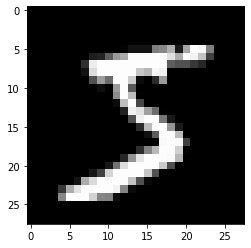

In [9]:
# tensor 이용시
# for grayscale : 0번 차원을 색인해서 사용
plt.imshow(trainset[0][0][0, :, :], cmap="gray")

In [10]:
# tensor 이용시
# for color 
# plt.imshow(trainset[0][0].permute(1, 2, 0))

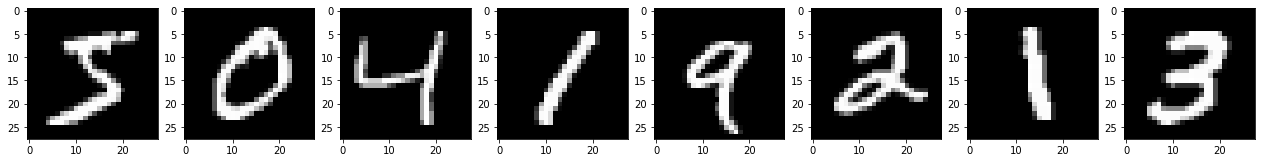

In [11]:
figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=8)
for i in range(8):
  axes[i].imshow(trainset[i][0][0, :, :], cmap="gray")

## 3. 데이터 적재

In [12]:
# 파이토치는 데이터를 셔플하거나, 병렬로 데이터를 부르거나,혹은 배치 작업을 
# torch.utils.data.DataLoader 를 통해서 도와줌
bath_size = 100
trainloader = DataLoader(trainset, batch_size=100, shuffle=True) # 훈련용
testloader = DataLoader(testset, batch_size=100, shuffle=False) # 검증용

In [13]:
print(type(trainloader), len(trainloader))
print(type(testloader), len(testloader))

<class 'torch.utils.data.dataloader.DataLoader'> 600
<class 'torch.utils.data.dataloader.DataLoader'> 100


In [14]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 100개의 image, 100개의 label
print(images.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


## 2. 모델 생성

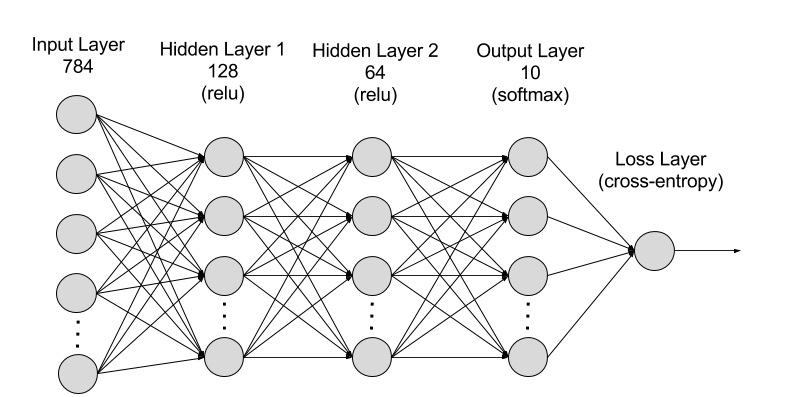

In [15]:
from torch import nn
from torch import optim
import torch.nn.functional as F

In [16]:
        # W1 shape (784, 50), B1 shape (50, ), W2 shape (50, 10). B2 shape (10,)
        # a1 = np.dot(x, W1) + b1
        # z1 = sigmoid(a1)
        
        # a2 = np.dot(z1, W2) + b2
        # y = softmax(a2)

In [17]:
class MnistDNN(nn.Module):
    def __init__(self):
        super().__init__()
        # 계층 정의하기 784(input), 50(hidden), 10(output)
        self.fc1 = nn.Linear(in_features=784, out_features=50)
        self.fc2 = nn.Linear(in_features=50, out_features=10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [18]:
# option1 과 option2는 같은 결과
# option 1
# softmax를 사용하지 않고 crossentropy()

# option 2
# LogSoftmax()를 사용하고 nn.NLLLoss()

#As stated in the torch.nn.CrossEntropyLoss() doc:
#This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
#Therefore, you should not use softmax before.

In [19]:
model = MnistDNN()
print(model)

MnistDNN(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [20]:
for parameter in model.parameters():
  print(parameter.size())

torch.Size([50, 784])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])


In [21]:
for name, parameter in model.named_parameters():
  print(name, parameter.size())

fc1.weight torch.Size([50, 784])
fc1.bias torch.Size([50])
fc2.weight torch.Size([10, 50])
fc2.bias torch.Size([10])


In [22]:
from torchsummary import summary

In [23]:
summary(model, (1, 784))   # (channel , input_size), # 참고: conv layer 입력시 (3, 28, 28)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 50]          39,250
            Linear-2                [-1, 1, 10]             510
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.15
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


In [24]:
784*50 +50, 50*10+10

(39250, 510)

## 3. 모델 컴파일 (손실함수, 옵티마이저 선택)

In [25]:
learning_rate = 0.1
criterion = nn.CrossEntropyLoss() # 손실함수
optimizer = optim.SGD(model.parameters(), lr=learning_rate) # 옵티마이저 : SGD()

## 4. 모델 훈련

In [ ]:
epochs = 15
steps = 0
# 1 에폭(epoch)당 반복수
iter_per_epoch = len(trainset) / bath_size  # 600 iterations, len(trainlader)

for e in range(epochs):
  running_loss = 0
  for images, labels in iter(trainloader): #iterator에서 100개씩 가져와 images와 labels에 전달
    steps += 1
    # flatten MNIST images -> 784 벡터
    images.resize_(images.size()[0], 784)
     
    optimizer.zero_grad()

    # 1. Forward (Loss 얻게됨)
    output = model.forward(images)
    loss = criterion(output, labels)

    # 2. Backward (Gradient가 오차역전파로 구해짐)
    loss.backward()

    # 3. Gradient Descent (Model parameter update) :  W <- W-lr*Gradient
    optimizer.step() 

    running_loss += loss.item() # 1 epoch 당 누적된 로스

    if steps % iter_per_epoch == 0 : #600, 1200
      print("Epoch: {}/{}...".format(e+1, epochs),
          "Loss: {}".format(running_loss/iter_per_epoch))
      running_loss = 0


## 5. 예측(Inference)

In [ ]:
# torch.no_grad()
# https://pytorch.org/docs/stable/generated/torch.no_grad.html
# Context-manager that disabled gradient calculation.

# Disabling gradient calculation is useful for inference, when you are sure that you will not call Tensor.backward(). 
# It will reduce memory consumption for computations that would otherwise have requires_grad=True.

In [34]:
images, labels = next(iter(testloader)) # 100장의 이미지와 레이블 가져옴
# images.shape : 100, 1, 28, 28
# images[2].shape : 1, 28, 28
img = images[2].view(1, 784)

# 역방향 연산시에는 gradient 값이 필요 
# 전방향(예측) 연산시에는 gradient가 필요하지 않음

with torch.no_grad():
    logits = model.forward(img) # 입력 : 1, 784

probs = F.softmax(logits, dim=1)
preds = probs.max(dim=1)[1] # probs의 index값만 가져옴
preds == labels[2] # 예측과 정답이 같은지 확인

tensor([True])

In [ ]:
plt.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap="gray")

## 6. 평가 (Evaluate)

In [ ]:
# test data에 대해서 예측한 것들이 몇개나 맞췄는지..(accuracy)

In [54]:
test_accuracy = 0
test_loss = 0

with torch.no_grad(): # 예측에는 gradient가 필요 없음
    for images, labels in testloader: # 1 iteration마다 배치 단위로 image와 label을 가져옴
        images.resize_(images.shape[0], 784) # batch size x 784
        logits = model.forward(images) # 입력 : 1, 784
        
        loss = criterion(logits, labels)
        test_loss += loss.item()

        probs = F.softmax(logits, dim=1)
        _, preds = torch.max(probs, 1) # preds = probs.max(dim=1)[1]
        correct = (preds == labels).sum()
        accuracy = correct / images.shape[0]
        test_accuracy += accuracy

print("Test Loss : ", test_loss/len(testloader))
print("Accuracy : ", test_accuracy/len(testloader))


Test Loss :  0.10884573087412719
Accuracy :  tensor(0.9748)


In [ ]:
## 7. 모델 훈련 (검증과 함께)

In [58]:
model = MnistDNN()

In [59]:
learning_rate = 0.1
criterion = nn.CrossEntropyLoss() # 손실함수
optimizer = optim.SGD(model.parameters(), lr=learning_rate) # 옵티마이저 : SGD()

In [56]:
def validation(model, testloader, criterion):
    test_accuracy = 0
    test_loss = 0

    with torch.no_grad(): # 예측에는 gradient가 필요 없음
        for images, labels in testloader: # 1 iteration마다 배치 단위로 image와 label을 가져옴
            images.resize_(images.shape[0], 784) # batch size x 784
            logits = model.forward(images) # 입력 : 1, 784
            
            loss = criterion(logits, labels)
            test_loss += loss.item()

            probs = F.softmax(logits, dim=1)
            _, preds = torch.max(probs, 1) # preds = probs.max(dim=1)[1]
            correct = (preds == labels).sum()
            accuracy = correct / images.shape[0]
            test_accuracy += accuracy

    return test_loss, test_accuracy            


In [60]:
epochs = 15
steps = 0
# 1 에폭(epoch)당 반복수
iter_per_epoch = len(trainset) / bath_size  # 600 iterations, len(trainlader)

for e in range(epochs):
  running_loss = 0
  for images, labels in iter(trainloader): #iterator에서 100개씩 가져와 images와 labels에 전달
    steps += 1
    # flatten MNIST images -> 784 벡터
    images.resize_(images.size()[0], 784)
     
    optimizer.zero_grad()

    # 1. Forward (Loss 얻게됨)
    output = model.forward(images)
    loss = criterion(output, labels)

    # 2. Backward (Gradient가 오차역전파로 구해짐)
    loss.backward()

    # 3. Gradient Descent (Model parameter update) :  W <- W-lr*Gradient
    optimizer.step() 

    running_loss += loss.item() # 1 epoch 당 누적된 로스
  
    if steps % iter_per_epoch == 0 : #600, 1200
        test_loss, test_accuracy = validation(model, testloader, criterion)

        print("Epoch : {}/{}...".format(e+1, epochs),
              "Train Loss : {:.3f}".format(running_loss/iter_per_epoch),
              "Test Loss : {:.3f}".format(test_loss/len(testloader)),
              "Test Accuracy : {:.3f}".format(test_accuracy/len(testloader)))

        running_loss = 0


Epoch : 1/15... Train Loss : 0.531 Test Loss : 0.302 Test Accuracy : 0.915
Epoch : 2/15... Train Loss : 0.270 Test Loss : 0.233 Test Accuracy : 0.933
Epoch : 3/15... Train Loss : 0.220 Test Loss : 0.195 Test Accuracy : 0.944
Epoch : 4/15... Train Loss : 0.187 Test Loss : 0.171 Test Accuracy : 0.950
Epoch : 5/15... Train Loss : 0.163 Test Loss : 0.155 Test Accuracy : 0.955
Epoch : 6/15... Train Loss : 0.145 Test Loss : 0.142 Test Accuracy : 0.959
Epoch : 7/15... Train Loss : 0.131 Test Loss : 0.131 Test Accuracy : 0.961
Epoch : 8/15... Train Loss : 0.120 Test Loss : 0.124 Test Accuracy : 0.963
Epoch : 9/15... Train Loss : 0.111 Test Loss : 0.119 Test Accuracy : 0.965
Epoch : 10/15... Train Loss : 0.102 Test Loss : 0.111 Test Accuracy : 0.966
Epoch : 11/15... Train Loss : 0.096 Test Loss : 0.107 Test Accuracy : 0.968
Epoch : 12/15... Train Loss : 0.090 Test Loss : 0.104 Test Accuracy : 0.967
Epoch : 13/15... Train Loss : 0.085 Test Loss : 0.101 Test Accuracy : 0.970
Epoch : 14/15... Trai